# This is the Notebook of the "Cluster Analysis and Unsupervised Machine Learning 2020-11" course

In [1]:
import os
import pandas as pd
from plotnine import * # visualize
import plotnine as p9
import patchworklib as pw # plot multiple graphs in a chart.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # setup plot quality

<Figure size 100x100 with 0 Axes>

In [2]:
master_dir = "/Users/binhvo/Library/CloudStorage/OneDrive-Personal/Documents_Mac/Ebooks/Python/Learning_myself/Python_practice"

In [5]:
# setup plot's color like ggplot color

# cited: https://www.statology.org/ggplot-default-colors/
# colors in the order: ograne, brown, dark green, light green, light blue, dark blue, purple, pink
color_palette_hex = ["#F8766D","#CD9600","#7CAE00","#00BE67","#00BFC4","#00A9FF","#C77CFF","#FF61CC"]

## custom setting
my_custom_fill = p9.scales.scale_fill_manual(values=color_palette_hex[slice(None, None, -1)])
my_custom_color = p9.scales.scale_color_manual(values=color_palette_hex[::-1])
    # slice(None, None -1) and [::-1] explain:
    # when slicing a list, we use slice(start, stop, step) or [start_position:end_position:increment]
    # so, in this case, the absence of the start and stop parameters means the complete array.
    # The negative step parameter means that data is taken in reverse order, from the end to the start. 

## usage:
# see Example 1 in Data_Analysis_and_Visualization.ipynb file

### Exercise 1: Give a dataste (X), cluster identities (Y) => find mean of each cluster.

• Generate a synthetic dataset X (N x D)

        - Recall: N = # of samples, D = # of features
        
        - Create totally random

        - Or appropriate for k-means (more useful): assign which data point is belonged to a specific cluster.

• Generate K cluster

• Generate cluster identities Y (label of each cluster) and Y contains N elements: Y(N)

        - Containing integers from 0 ... K-1 inclusive
        
• I will use N=300, D=2, K=3

        - Y[i] € {0, 1, 2}

        - 100 samples in each cluster

• Calculate the mean of each cluster

        - Suppose K=3 - loop through each of the cluster values (0, 1, 2).
 
        - For each cluster, get all the points in X belonging to that cluster.
  
• E.g. for cluster 0, get all X[i] which belong to cluster O (using Y).

• Obtain the mean of those data points.

• Then repeat for cluster 1 and 2.

• What size should the mean of each cluster be?

In [73]:
# initial configuration
N = 300 # number of elements
K = 3 # number of clusters
D = 2 # number of dimensions

In [74]:
# create a data point which is the mean of a cluster.
# so, from this point, spread out data points surrounding the mean as Gaussian distribution
mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([0,5])

In [80]:
# create a initial dataset which is a Null array.
X = np.zeros((N,D))

In [81]:
# sanity check
X

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [76]:
# create data points to each index and assign them to a specific cluster.
# for example, index 0 to 100 is belonged to cluster 1 with mu1. The mu1 data point is surrounded by thoes values.
X[0:100, :] = np.random.randn(100, D) + mu1
X[100:200, :] = np.random.randn(100, D) + mu2
X[200:300, :] = np.random.randn(100, D) + mu3

In [77]:
# sanity check
X.shape

(300, 2)

In [100]:
# sanity check
X[0:10,]

# == X[:10,]

array([[-1.80894577e+00,  1.63169155e+00],
       [ 7.72214281e-01, -1.02859714e-05],
       [ 9.85567543e-01,  1.33311003e+00],
       [ 6.97374530e-02, -2.33942675e-01],
       [ 2.42327386e+00,  1.14607642e+00],
       [-1.45534586e+00, -1.39116744e-01],
       [ 5.44944213e-01, -9.79401296e-02],
       [ 3.07311842e-01, -2.16505809e-01],
       [-1.38504064e+00, -9.70107540e-01],
       [-1.06103316e+00, -4.01740237e-01]])

In [ ]:
# the first column of X matrix
X[:,0]

# the second column of X matrix
X[:,1]

array([ 0.69917722,  0.2251862 , -1.20170518,  0.86749767,  0.30315819,
       -0.60982164,  0.39599509, -1.21095446, -0.72003997, -0.7280127 ,
       -0.22786781, -0.57324926,  0.28484787, -0.11768818, -0.26476944,
       -0.8592912 ,  0.51864015,  0.77870837,  0.05060543,  0.10940774,
        0.24149514,  0.43692585, -0.73106875,  0.07828567, -1.96770322,
       -0.63513767, -0.64950031,  1.52171098, -0.81072351, -0.79017108,
       -1.58666471,  0.40603816,  0.26505515,  0.42494803,  1.22940861,
        0.24807791,  0.65776775,  1.40463658, -2.18793576,  1.5512642 ,
        0.72046688, -1.40473474,  0.41815532, -2.41452225, -1.25524274,
       -0.66638706, -1.58159815,  0.78987593,  0.60413046, -1.17852929,
       -0.96856202,  1.1024731 , -0.57862059, -0.80229709,  1.15846529,
        1.36487573, -0.57622866, -0.14663299, -0.23250709,  0.20142223,
       -0.30431159,  1.51948628,  1.47845636,  1.00205839, -1.65097438,
        0.36829418, -1.78690567, -0.70954332, -1.23464106, -0.74

In [26]:
# the first element of X matrix = the first row in 300 rows
X[0,:]

array([-1.03455747,  0.69917722])

In [ ]:
# create a vector storing identity of each elements
# it means the first 100 elements are 0, the next 100 are 1 and the rest is 2.

# we can append a list by a multiply
Y = np.array([0]*100 + [1]*100 + [2]*100)

In [82]:
# sanity check
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [83]:
# sanity check
Y.shape

(300,)

In [84]:
# calculate the mean of a matrix
X.mean(axis=0)

# this value is different from X.mean()
# the X.mean() value is the average of the whole values of a matrix calculating by: (sum of 300 data points)/300

array([0., 0.])

In [31]:
# create a vector storing the mean value of each cluster.
mean = np.zeros((K,D))

In [86]:
mean[0,:] = X[Y==0].mean(axis=0)
mean[1,:] = X[Y==1].mean(axis=0)
mean[2,:] = X[Y==2].mean(axis=0)

In [85]:
# sanity check.
mean

array([[-0.02042778, -0.1120831 ],
       [ 4.9590223 ,  5.14461426],
       [-0.03701647,  5.20132158]])

In [88]:
# convert matrix to dataframe for plotting by plotnine.
df = pd.DataFrame(X, columns=['x', 'y'])
mean_df = pd.DataFrame(mean, columns=['x', 'y'])

In [35]:
df.head()

,x,y
0,-1.034557,0.699177
1,0.681995,0.225186
2,-1.542136,-1.201705
3,-1.275992,0.867498
4,-0.673591,0.303158


In [37]:
mean_df.head()

,x,y
0,-0.020428,-0.112083
1,4.959022,5.144614
2,-0.037016,5.201322


In [38]:
# create a column storing label of each data point.
df['cluster'] = Y

In [39]:
df.tail()

,x,y,cluster
295,1.378115,3.995193,2
296,-0.881918,4.580055,2
297,-0.370651,4.429113,2
298,0.339263,6.622952,2
299,0.498845,3.834348,2


In [64]:
df1 = df.groupby(by='cluster').mean()
df1

# df1 = mean_df
# hence, mean a array-derived dataframe = mean a array

,x,y
cluster,,
0,-0.020428,-0.112083
1,4.959022,5.144614
2,-0.037016,5.201322


In [69]:
# combine two plots from different dataframes.
# cited: https://stackoverflow.com/questions/9109156/ggplot-combining-two-plots-from-different-data-frames

# highlight the mean values were calculated by pd.DataFrame.mean
p1 = (ggplot()
     + geom_point(
         df,
         aes(
             x = 'x',
             y = 'y',
             color = 'factor(cluster)'
         )
     )
     + geom_point(
         df1,
         aes(
             x = 'x',
             y = 'y'
         ),
         color = 'black',
         size = 5
     )
)

In [70]:
# combine two plots from different dataframes.
# cited: https://stackoverflow.com/questions/9109156/ggplot-combining-two-plots-from-different-data-frames

# highlight the mean values were calculated by np.array.mean
p2 = (ggplot()
    + geom_point(
        df,
        aes(
            x = 'x',
            y = 'y',
            color = 'factor(cluster)'
        )
    )
    + geom_point(
        mean_df,
        aes(
            x = 'x',
            y = 'y'
        ),
        color = 'black',
        size = 5
    )
)

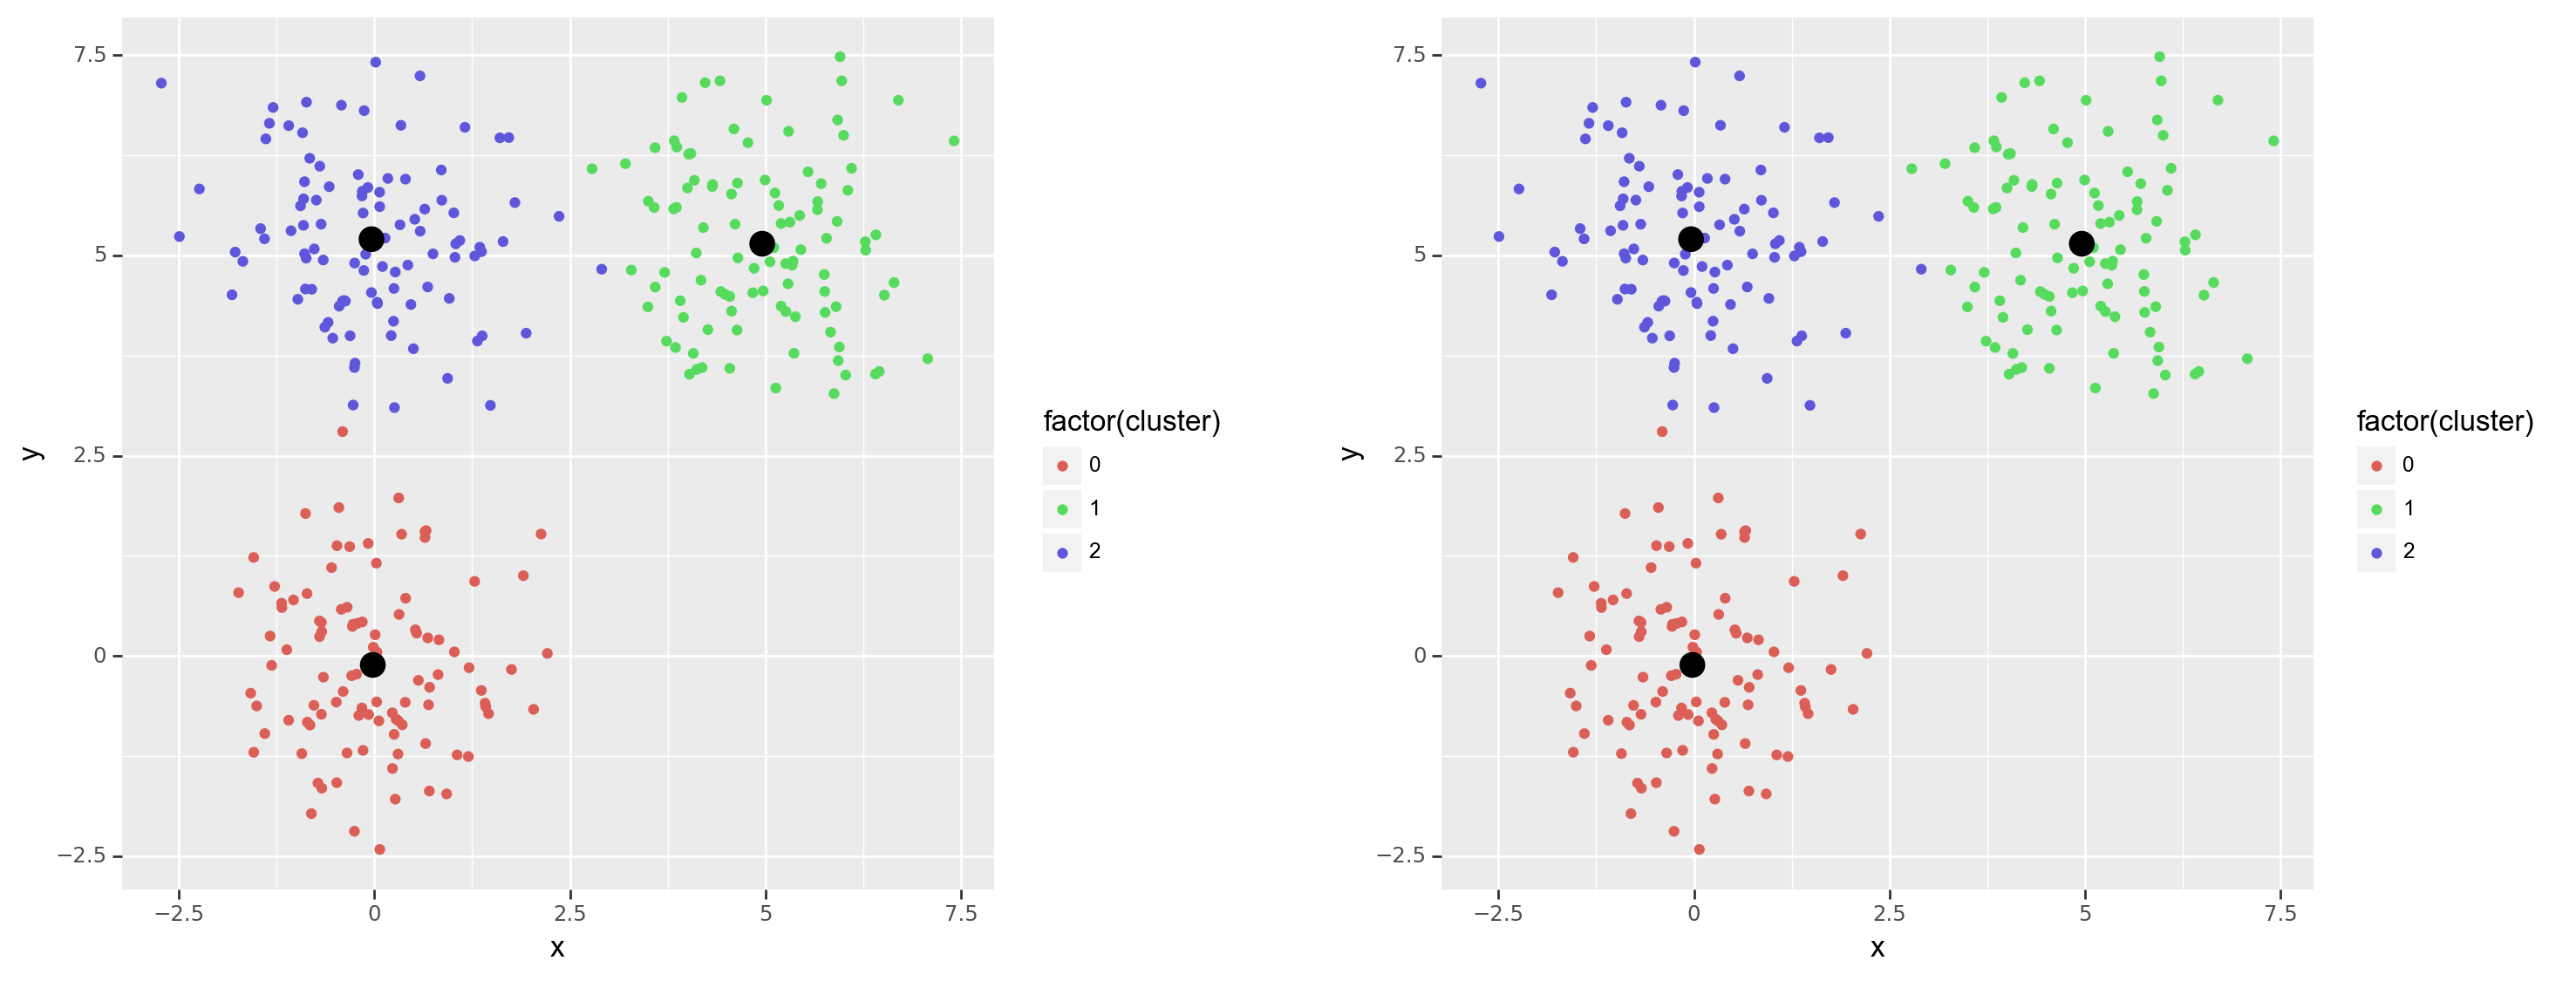

In [71]:
# compare these two plots
# using 'patchworklib' package
p1 = pw.load_ggplot(p1, figsize=(5,5))
p2 = pw.load_ggplot(p2, figsize=(5,5))
p12 = (p1|p2)
p12.savefig()

=> if a matrix is converted to a dataframe,
the mean of a matrix equals the vector which comprises the means of each column.
For example, X matrix is (300,2),
so the means of this matrix after converted to a dataframe is a vector: (mean of col1, mean of col2)

### Exercise 2: give a dataset (X), cluster's mean => find the cluster identities (Y)
- a point belongs to a cluster if that cluster's mean is closest to it.
- use squared Euclidean distance.

In [90]:
# initial configuration
N = 300
K = 3
D = 2

In [ ]:
# create a null dataset
X = np.zeros((N, D))

In [120]:
# create a null identities
Y = np.zeros(N)

In [116]:
# create array storing means of cluster
mean = np.array([[0,0],
                [5,5],
                [0,5]])

In [118]:
# create randomly data points surrounding those cluster's means.
X[0:100,] = np.random.randn(100,D) + mean[0]
X[100:200,] = np.random.randn(100,D) + mean[1]
X[200:300,] = np.random.randn(100,D) + mean[2]

In [119]:
# sanity check
X[:10,]

array([[-0.26840997, -2.43380894],
       [ 0.55202612,  0.40346778],
       [-0.43589101, -1.38406559],
       [ 0.01229898, -0.49263796],
       [-0.45767246,  0.54086111],
       [ 1.05290309,  0.79863213],
       [ 0.91763815,  0.15154797],
       [-0.17363172,  0.60034148],
       [ 0.84497931, -1.44954295],
       [ 0.86970461,  0.88980932]])

In [133]:
# calculate the squared Euclidean distance from each data points to each mean of clusters.
# then assign each data point to the cluster which has the smallest distance.
for n in range(N):
    min_distance = float('inf') # declare a distance variable with a max value.
    cluster = -1 # declare a cluster variable.
    for k in range(K):
        eu_distance = np.sum(np.square((X[n,:] - mean[k,:]))) # calculate squared Euclidean distance.
        if eu_distance < min_distance:
            min_distance = eu_distance # if eu_distance is the min value, set it as a min distance.
            cluster = k # so the cluster is k value.
    Y[n] = cluster # after iterating through k clusters, set identity as the k value.

In [122]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [130]:
# convert matrix to dataframe for plotting by plotnine.
df = pd.DataFrame(X, columns=['x', 'y'])

In [131]:
# append identities Y as a column
df['cluster'] = Y

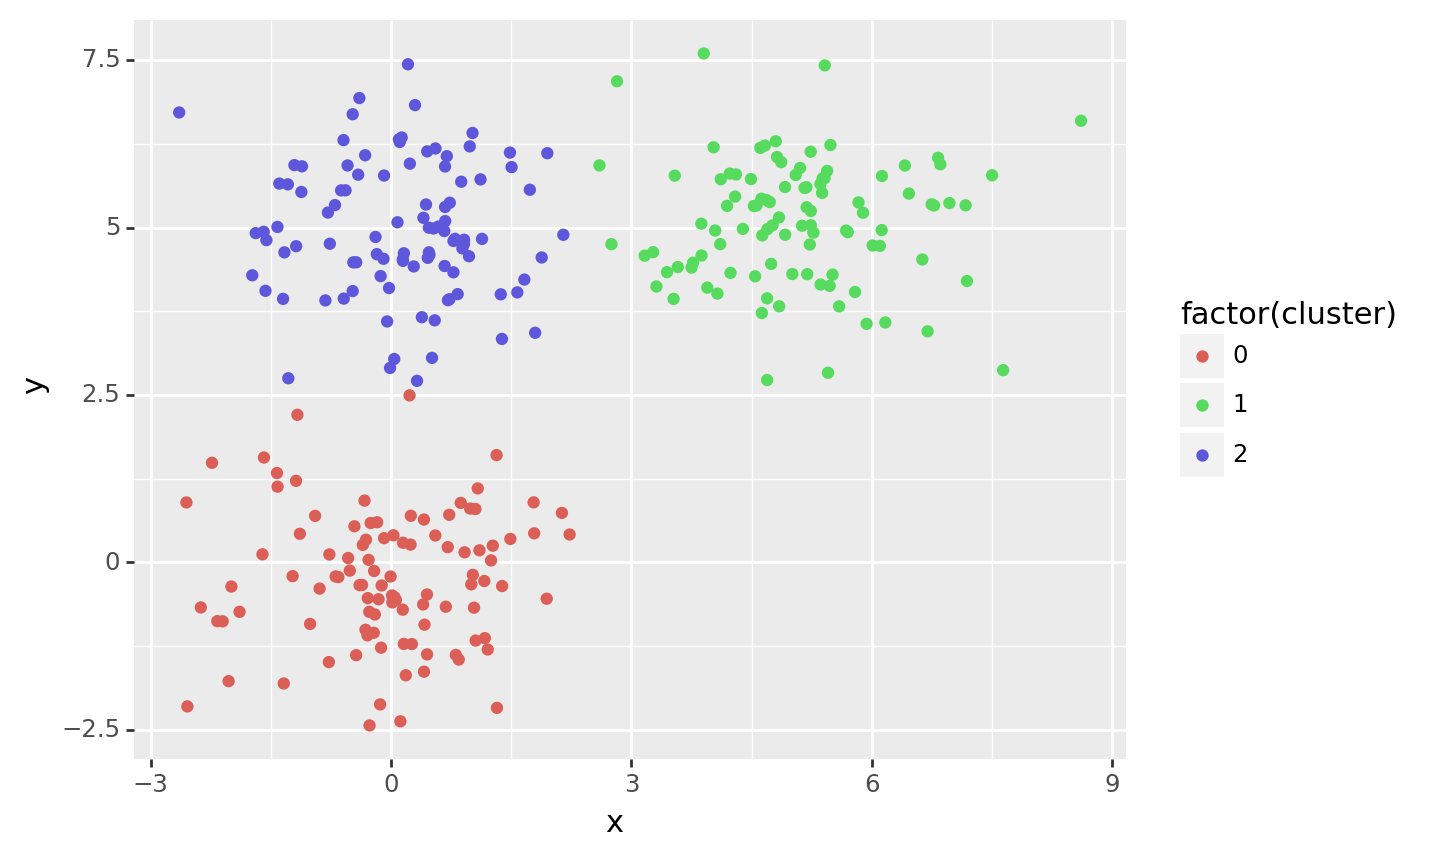

In [132]:
# sanity check by plotting
(ggplot()
     + geom_point(
            df,
            aes(
                x = 'x',
                y = 'y',
                color = 'factor(cluster)'
            )
        )
).draw()
plt.show()

=> each data point is assigned in a appropriate cluster.

### Exercise 3: Implement k-means clustering in code by combining exercise 1 and 2.

• Generate X (N × D) // useful if looks appropriate for clustering

• Initialize cluster centers by randomly choosing K points from

• k-means Loop:
   
        - 2 steps discussed previously

        - Exit loop if converged

• Scatterplot of data colored by cluster identity, showing cluster centers

In [3]:
# initial configuration
N = 300
K = 3
D = 2

In [4]:
###### create a dataset

# choose mean values following Gaussian distribution
mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([0,5])

# initial dataset
X = np.zeros((N,D))

# assign random values to the dataset
X[0:100,:] = np.random.randn(100, D) + mu1
X[100:200,:] = np.random.randn(100, D) + mu2
X[200:300,:] = np.random.randn(100, D) + mu3

In [5]:
# sanity check
X[0:10,:]

array([[-1.33846424e+00,  5.66058988e-01],
       [ 1.55383057e-01,  4.70134022e-01],
       [-2.52981718e-01,  1.42999084e+00],
       [ 2.44645243e+00, -1.57985858e-03],
       [ 1.13983595e+00, -5.91209377e-01],
       [ 4.47693463e-01,  3.51100694e-01],
       [ 9.29175810e-01, -2.39316714e+00],
       [ 1.03938912e+00, -1.51937878e+00],
       [ 2.32614690e-01,  5.35222217e-01],
       [-6.87992848e-01,  8.01603574e-01]])

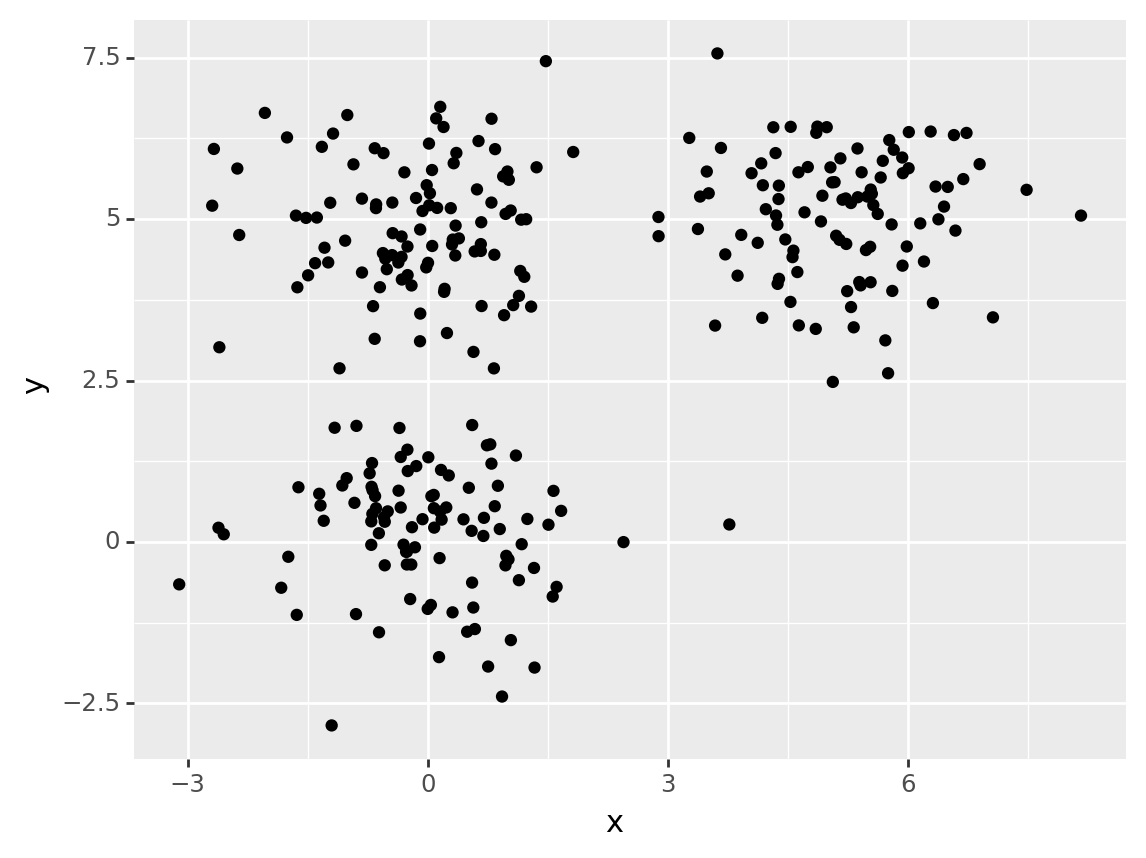

In [6]:
###### sanity check a initial dataset by plotting

# convert array to dataframe
df = pd.DataFrame(data=X, columns=['x', 'y'])

# plotting
(ggplot(df)
    + aes(
        x = 'x',
        y = 'y'
    )
    + geom_point()
).draw()
plt.show()

=> at the beginning, the data points were not labeled, so all of data points had the same color.

=> Exercise 1: DONE

In [7]:
###### randomly pick up 3 cluster centers.
cluster_centers = np.zeros((K, D))
for k in range(K):
    i = np.random.choice(N)
    cluster_centers[k] = X[i]

In [8]:
# sanity check
cluster_centers

array([[-0.70080811,  0.85488221],
       [ 5.92851736,  5.95444682],
       [ 5.18254149,  5.30126224]])

In [9]:
###### k-means loops

### declare variables
max_iters = 20 # set the maximum number of iterations
cluster_identities = np.zeros(N) # set the identities array having 300 elements, corresponding 300 data points.
saved_cluster_identities = [] # set the null list storing identities after each iteration to check the convergence

### loop
for i in range(max_iters):
    # set a temporary array storing identities after iterating.
        old_cluster_identities = cluster_identities.copy()
    
    # store cluster_identities arrays to the null list 
    # for visualisating the process of auto-correction using centriods
        saved_cluster_identities.append(old_cluster_identities)
        
    # determine cluster identities
        for n in range(N):
            min_distance = float('inf') # declare a distance variable with a max value.
            cluster = -1 # declare a cluster variable.
            for k in range(K):
                eu_distance = np.sum(np.square((X[n,:] - cluster_centers[k,:]))) # calculate squared Euclidean distance.
                if eu_distance < min_distance:
                    min_distance = eu_distance # if eu_distance is smaller than the min_distance, set it as min_distance.
                    cluster = k # so the cluster is k value.
            cluster_identities[n] = cluster # after iterating through k clusters, set identity as the k value.
    
    # re-calculate cluster means
        for k in range(K):
            cluster_centers[k,:] = X[cluster_identities == k].mean(axis=0)

    # check the convergence
        # np.all = TRUE if all elements of old_cluster_identities equals the cluster_identities counterparts
        if np.all(old_cluster_identities == cluster_identities):
            print(f"Converged on step {i}")
            break


Converged on step 7


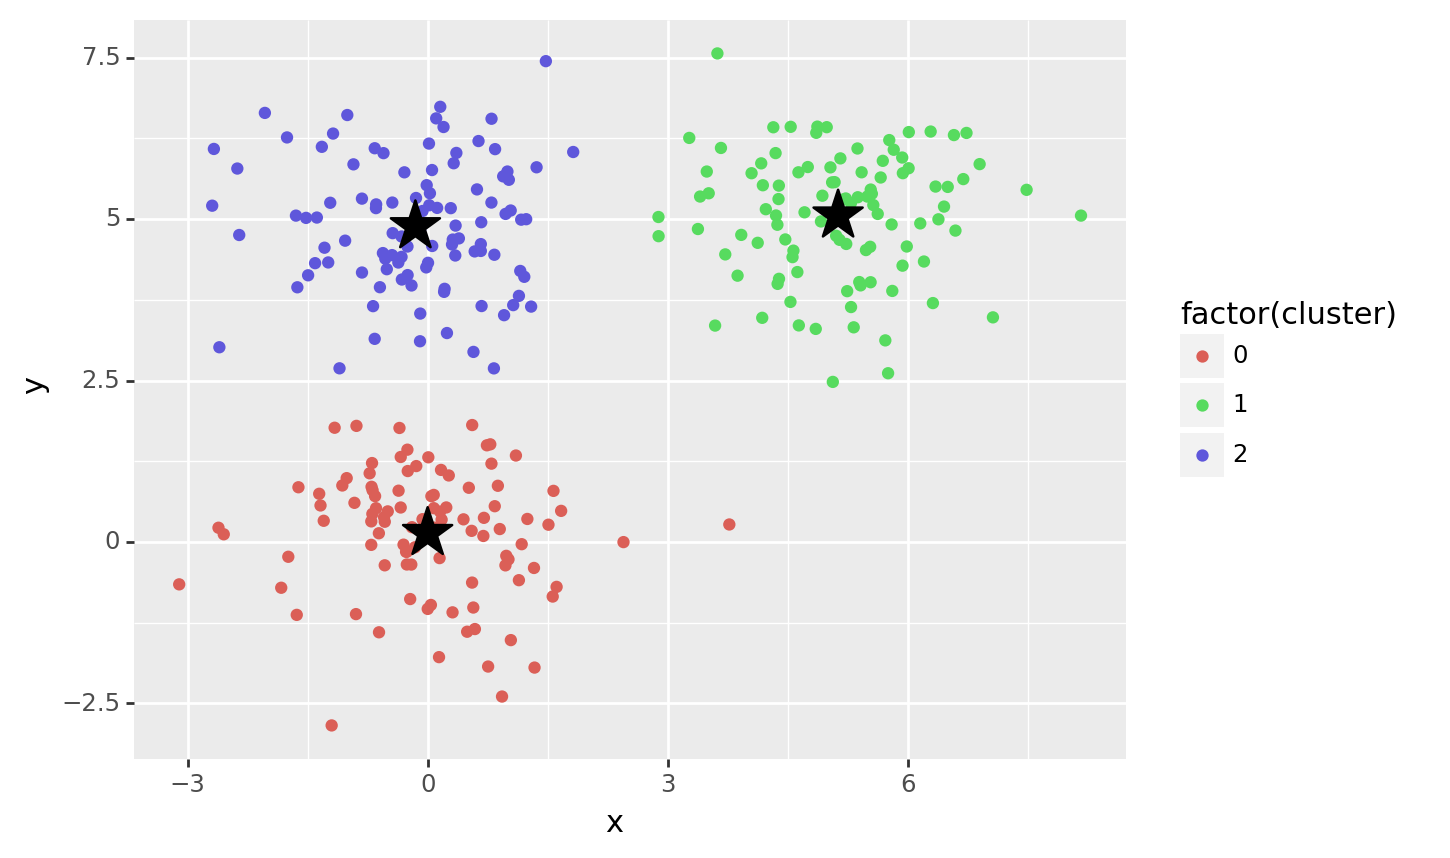

In [10]:
####### sanity check by plotting

# assign label to each data point
df['cluster'] = cluster_identities

# convert cluster_centers array to dataframe.
center = pd.DataFrame(data=cluster_centers, columns=['x', 'y'])

# plotting
(ggplot()
    + geom_point(
        df,
        aes(
            x = 'x',
            y = 'y',
            color = 'factor(cluster)'
        )
    )
    + geom_point(
        center,
        aes(
            x = 'x',
            y = 'y'
        ),
        shape = '*',
        color = 'black',
        size = 10
    )
).draw()
plt.show()

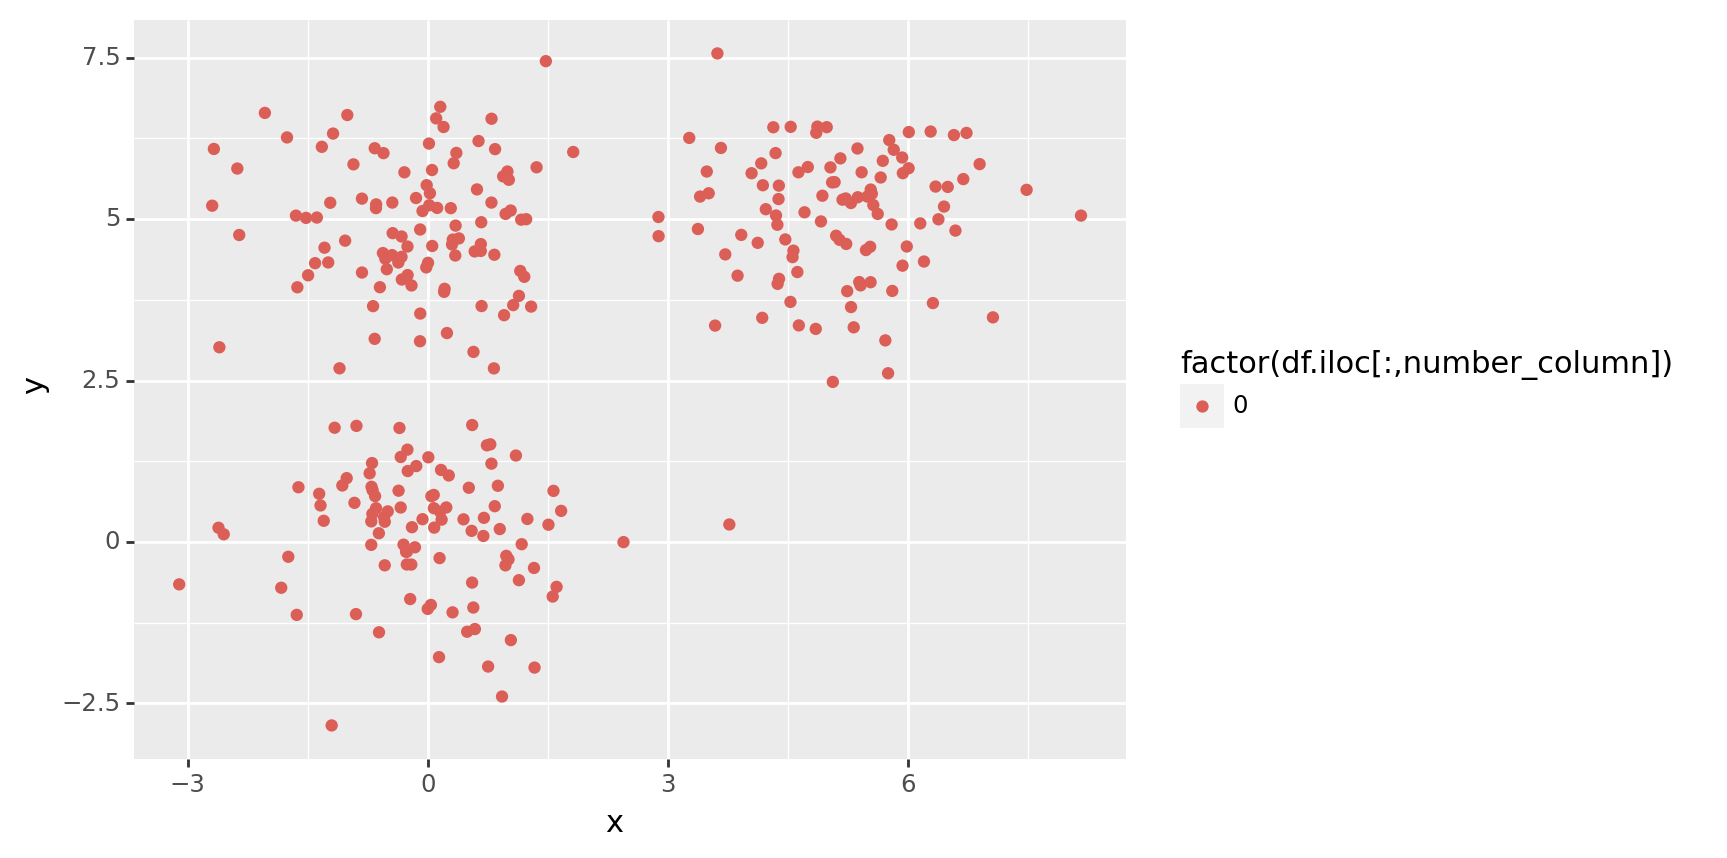

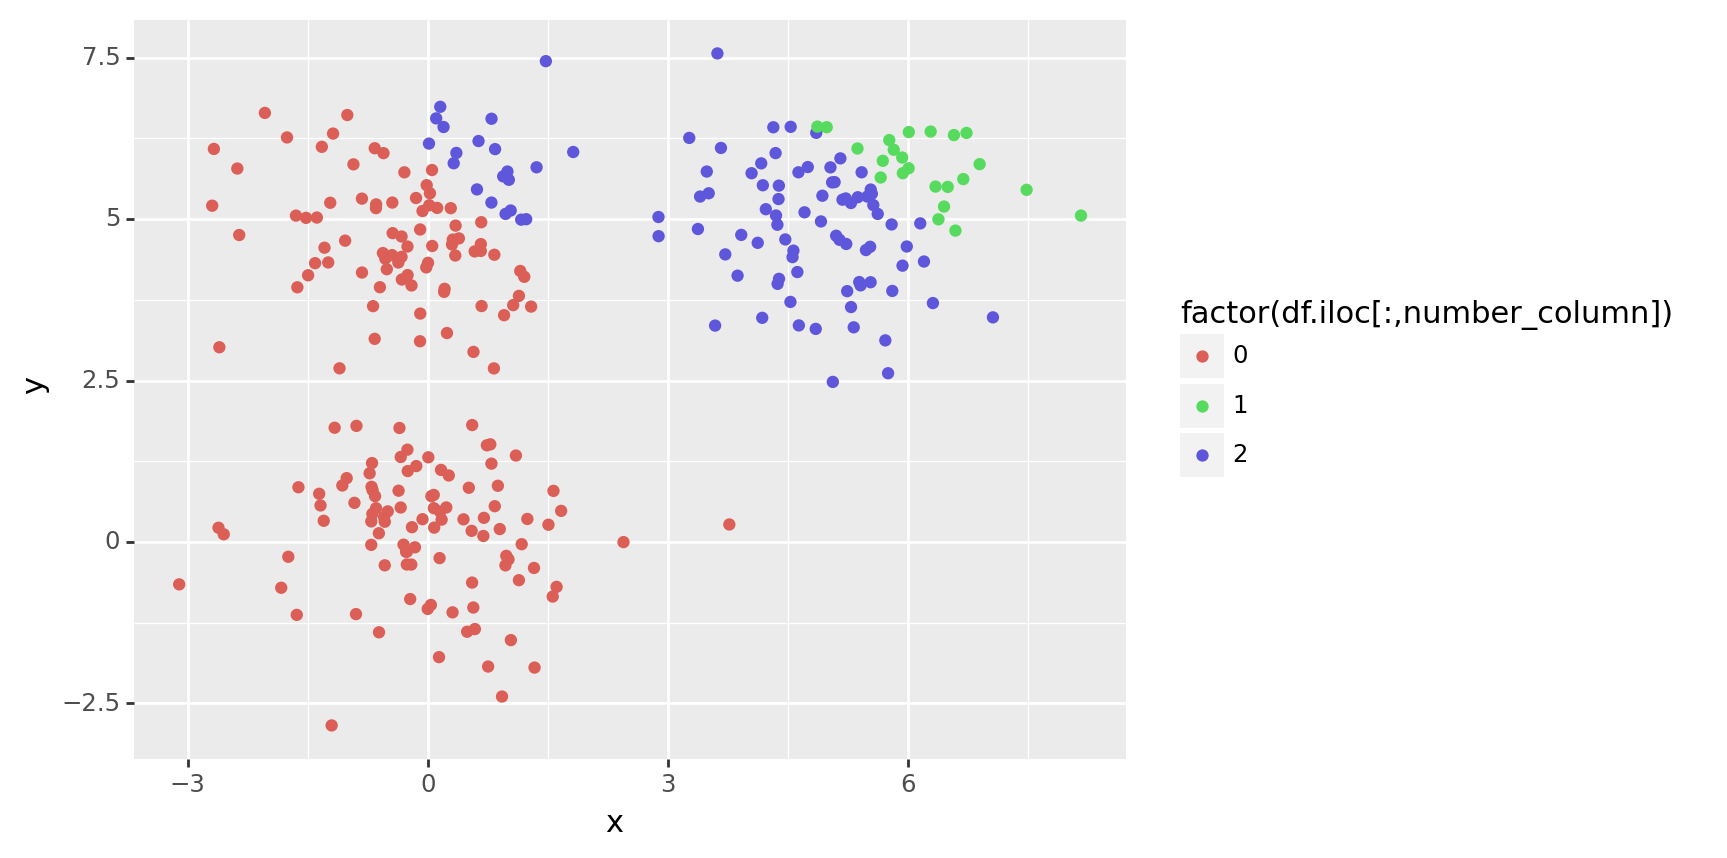

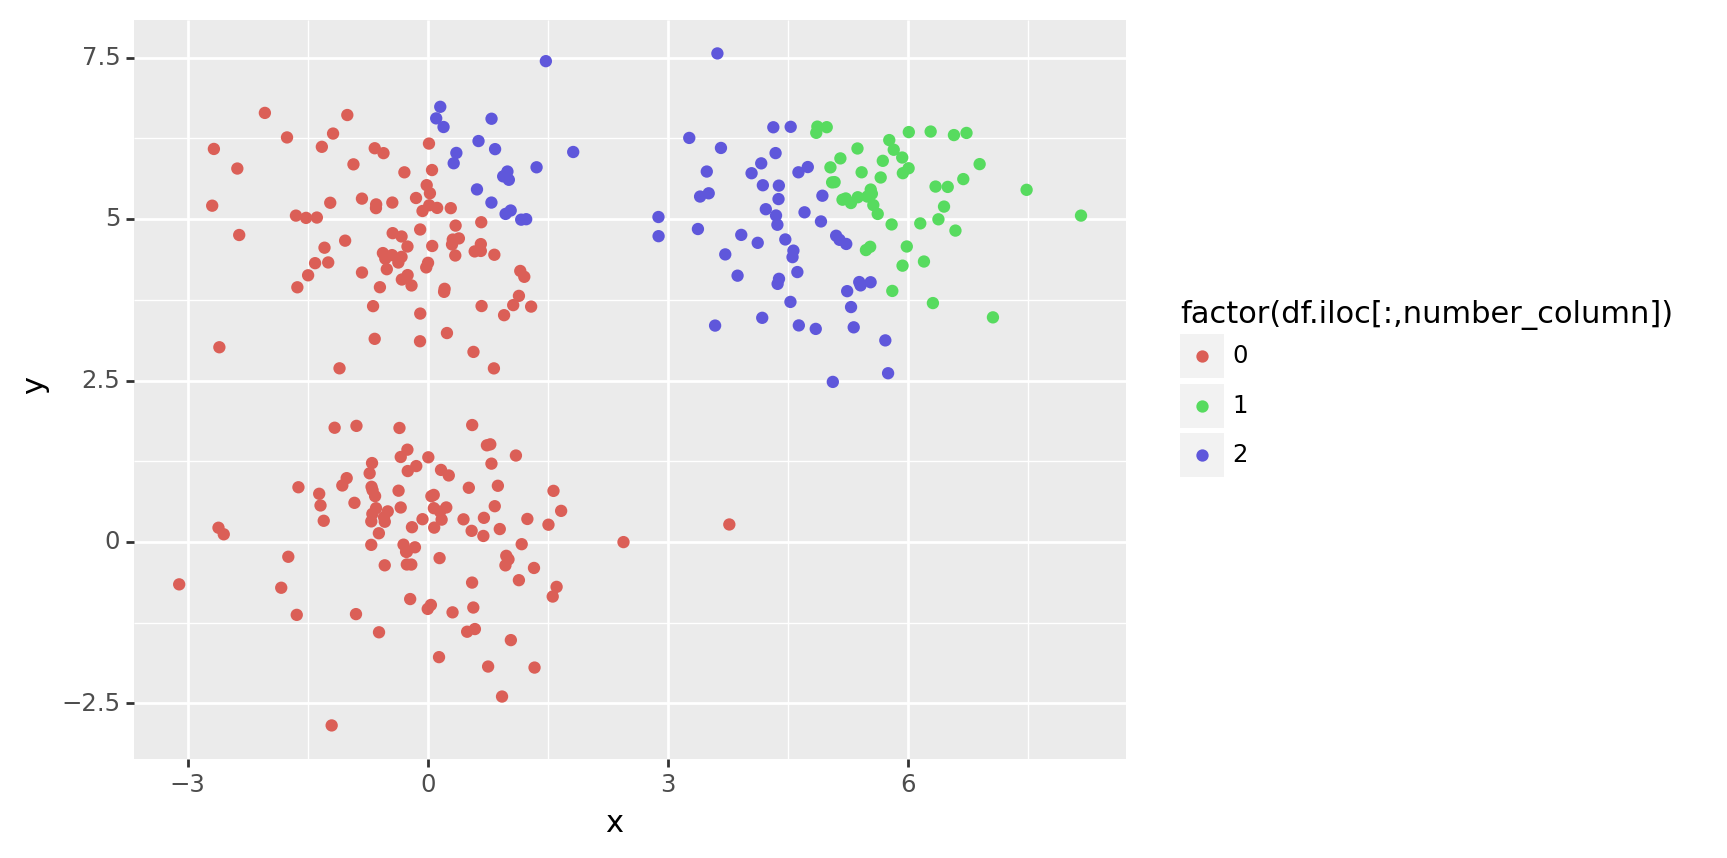

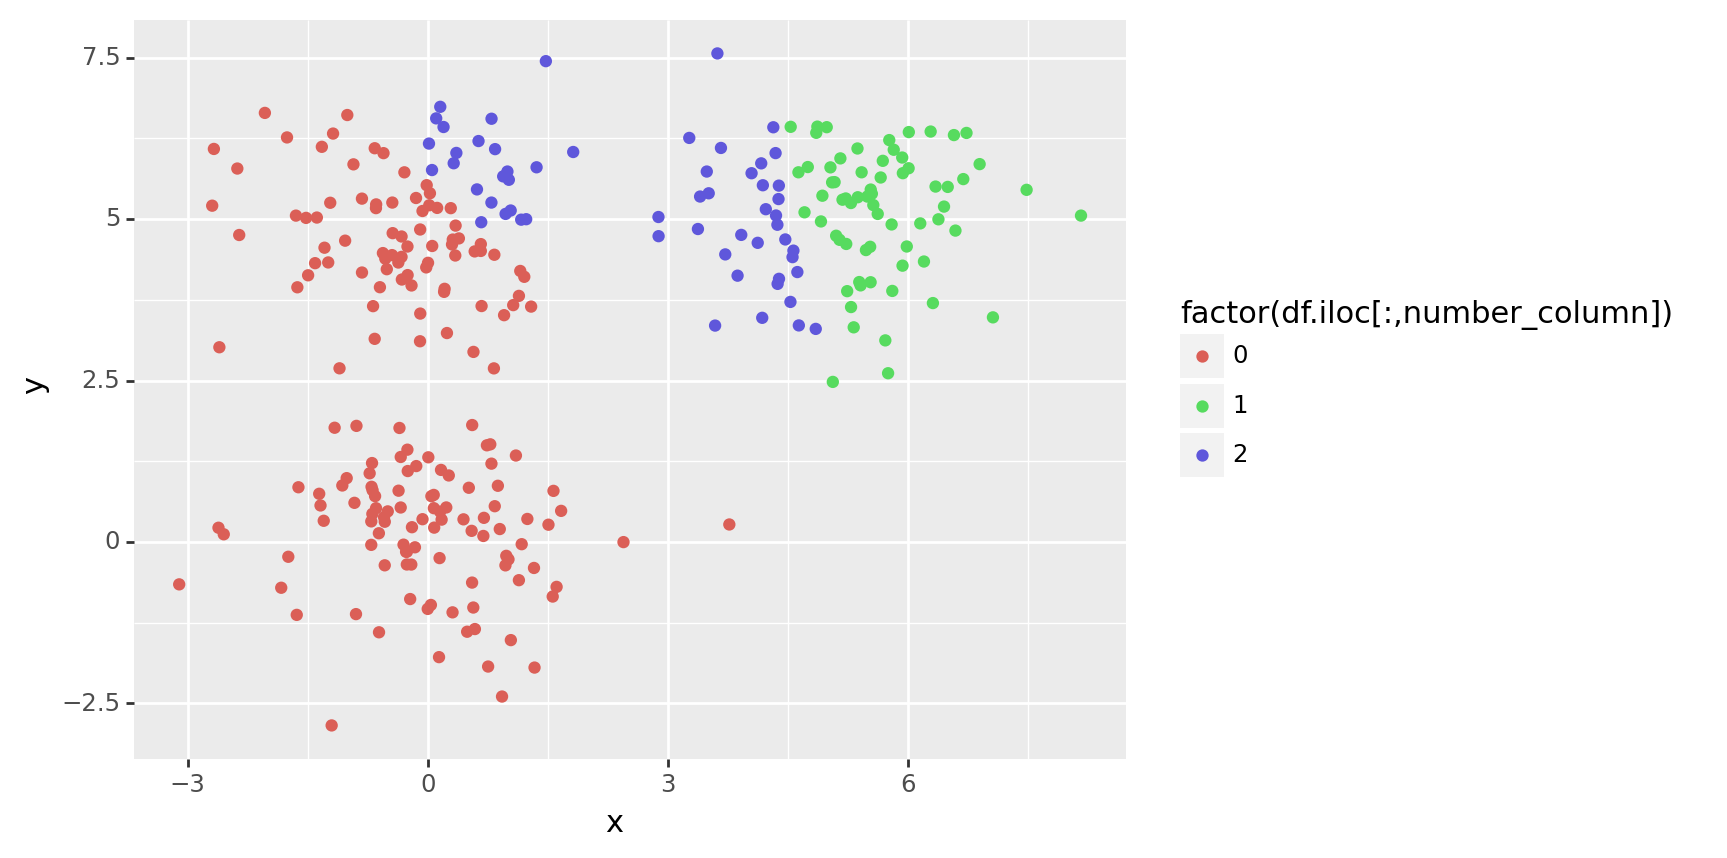

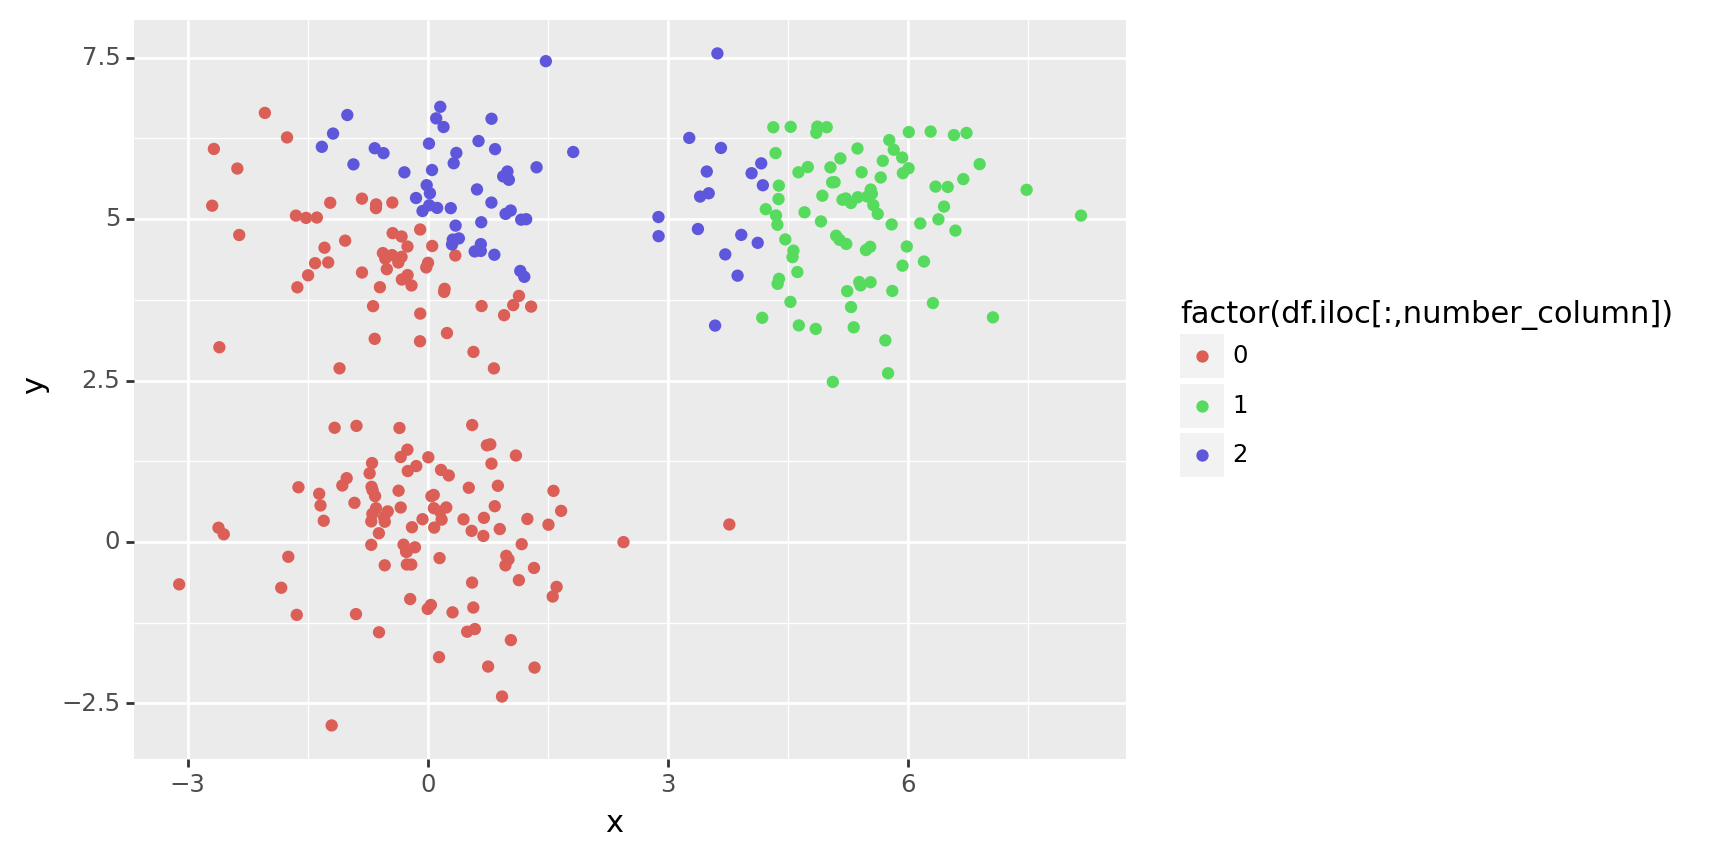

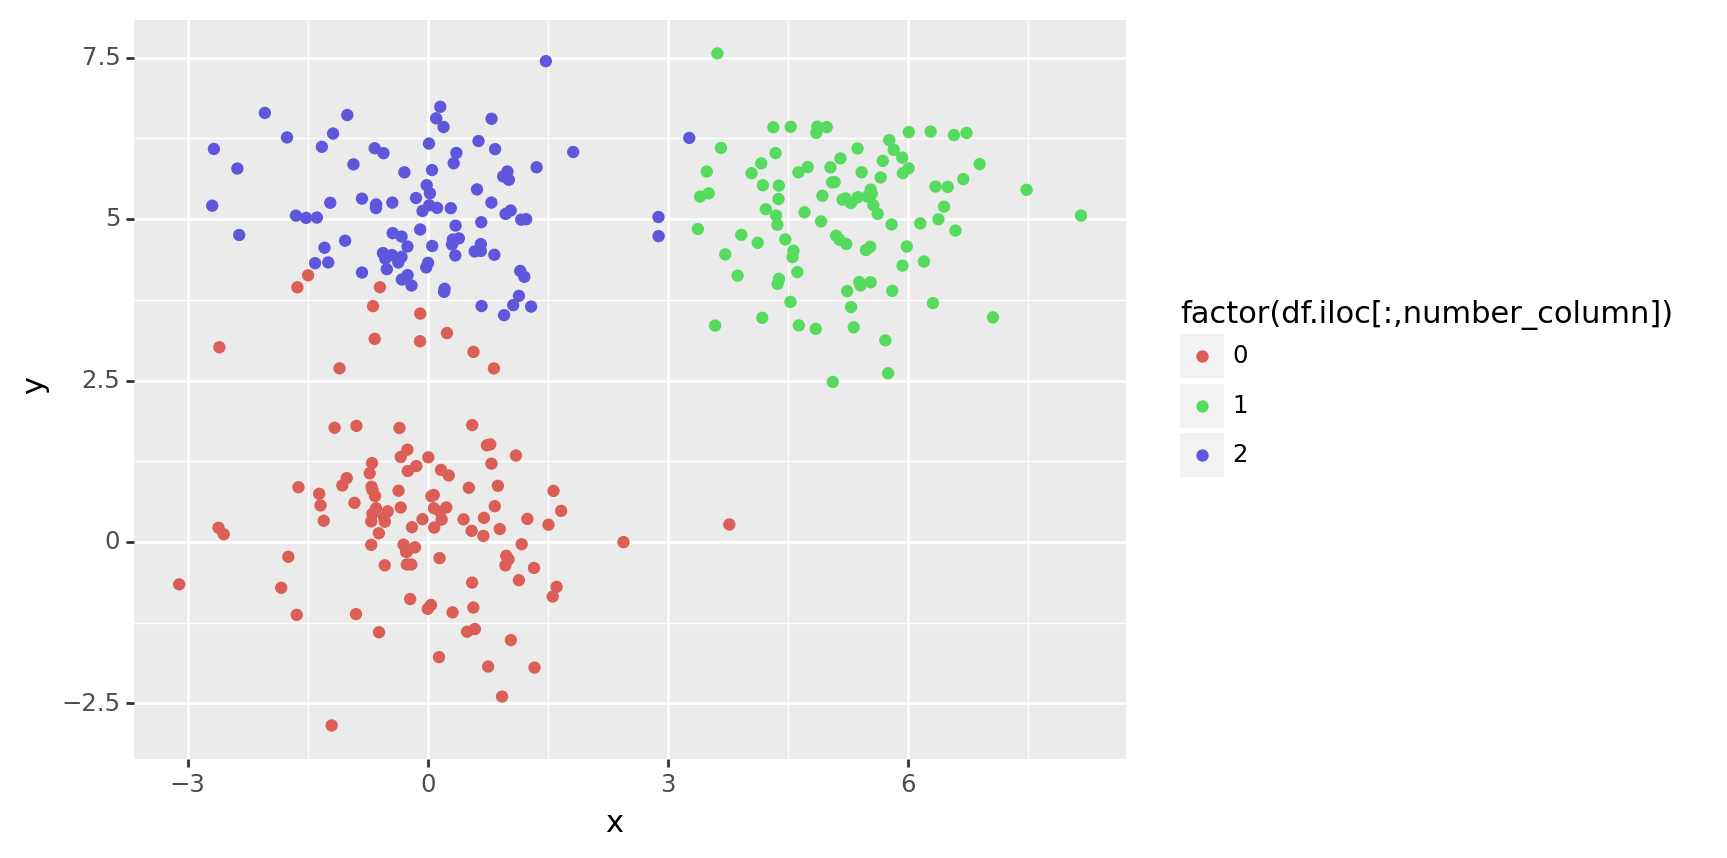

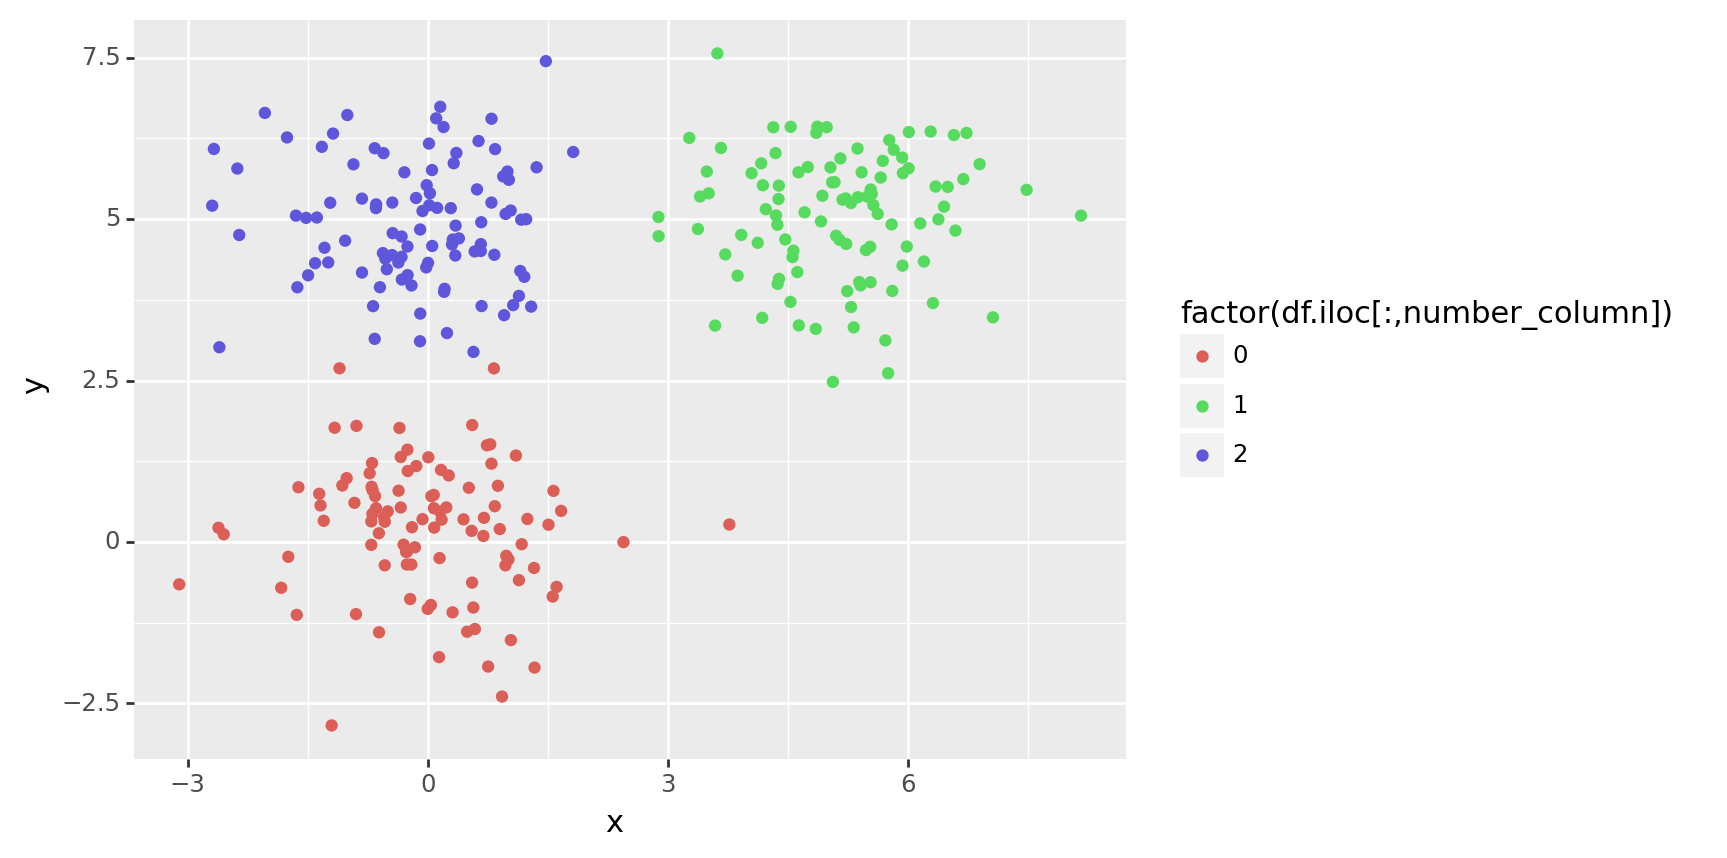

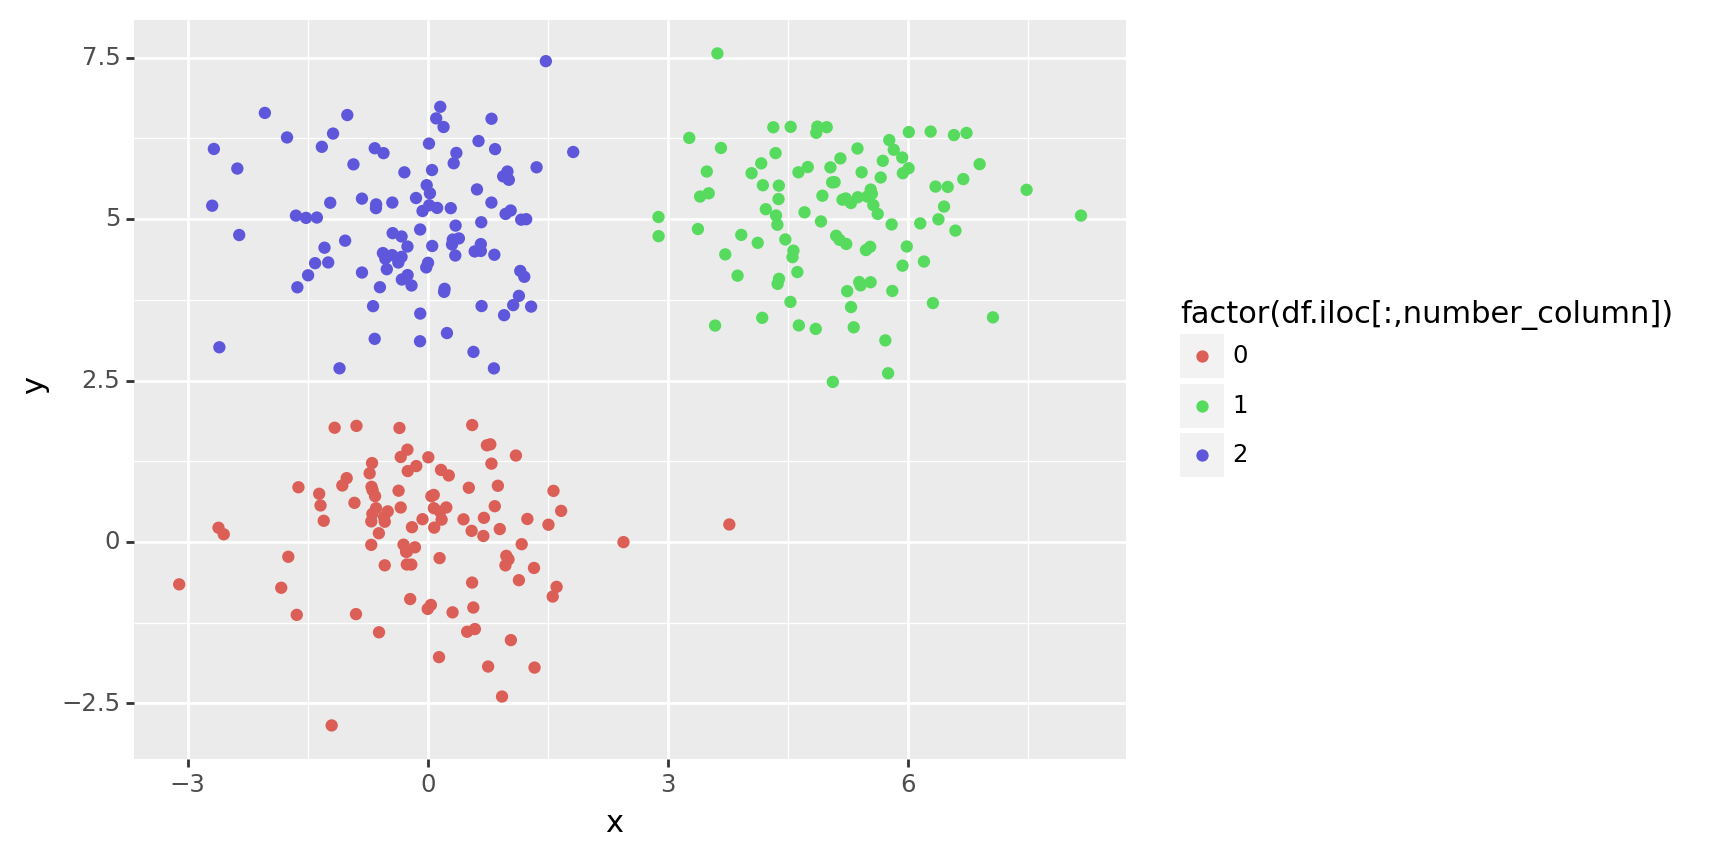

In [11]:
# show the process of assign and re-assign label to data points
# for sanity check purpose
M = len(saved_cluster_identities)
for i in range(M):
    df[f'cluster_in_iter_{i}'] = saved_cluster_identities[i] # use variable when indexing dataframe.
    number_column = i + 3
    (ggplot(df)
        + aes(
            x = 'x',
            y = 'y',
            color = 'factor(df.iloc[:,number_column])'
        )
        + geom_point()
    ).draw()
    plt.show()


=> these images above showed the auto-correction process of labeling data points per iteration.

### Final step: Calculating the Cost function of K-means (K-means objective)

- This value is the sum of Euclidean distance of the whole data points in a cluster per iteration.

- So, the aim of K-means clustering is minimise the Cost function

In [12]:
# initial configuration
N = 300
K = 3
D = 2

In [62]:
###### create a dataset

# choose mean values following Gaussian distribution
mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([0,5])

# initial dataset
X = np.zeros((N,D))

# assign random values to the dataset
X[0:100,:] = np.random.randn(100, D) + mu1
X[100:200,:] = np.random.randn(100, D) + mu2
X[200:300,:] = np.random.randn(100, D) + mu3

In [63]:
###### k-means loops

### declare variables
max_iters = 20 # set the maximum number of iterations
cluster_identities = np.zeros(N) # set the identities array having 300 elements, corresponding 300 data points.
sum_distance = np.zeros(N)
cost = []

### loop
for i in range(max_iters):
    # set a temporary array storing identities after iterating.
        old_cluster_identities = cluster_identities.copy()
    
    # determine cluster identities
        for n in range(N):
            min_distance = float('inf') # declare a distance variable with a max value.
            cluster = -1 # declare a cluster variable.
            for k in range(K):
                eu_distance = np.sum(np.square((X[n,:] - cluster_centers[k,:]))) # calculate squared Euclidean distance.
                if eu_distance < min_distance:
                    min_distance = eu_distance # if eu_distance is smaller than the min_distance, set it as min_distance.
                    cluster = k # so the cluster is k value.
            cluster_identities[n] = cluster # after iterating through k clusters, set identity as the k value.
            sum_distance[n] = min_distance
    
    # store the cost
        cost.append(sum_distance.sum())
    
    # re-calculate cluster means
        for k in range(K):
            cluster_centers[k,:] = X[cluster_identities == k].mean(axis=0)

    # check the convergence
        # np.all = TRUE if all elements of old_cluster_identities equals the cluster_identities counterparts
        if np.all(old_cluster_identities == cluster_identities):
            print(f"Converged on step {i}")
            break

Converged on step 3


In [71]:
cost

[649.570661788373, 630.7073887055595, 629.808276040118, 629.6787403991162]

In [76]:
df_cost = pd.DataFrame(data=cost, columns=['value'])
df_cost

,value
0,649.570662
1,630.707389
2,629.808276
3,629.678740


In [79]:
df_cost['step'] = df_cost.index
df_cost

,value,step
0,649.570662,0
1,630.707389,1
2,629.808276,2
3,629.678740,3


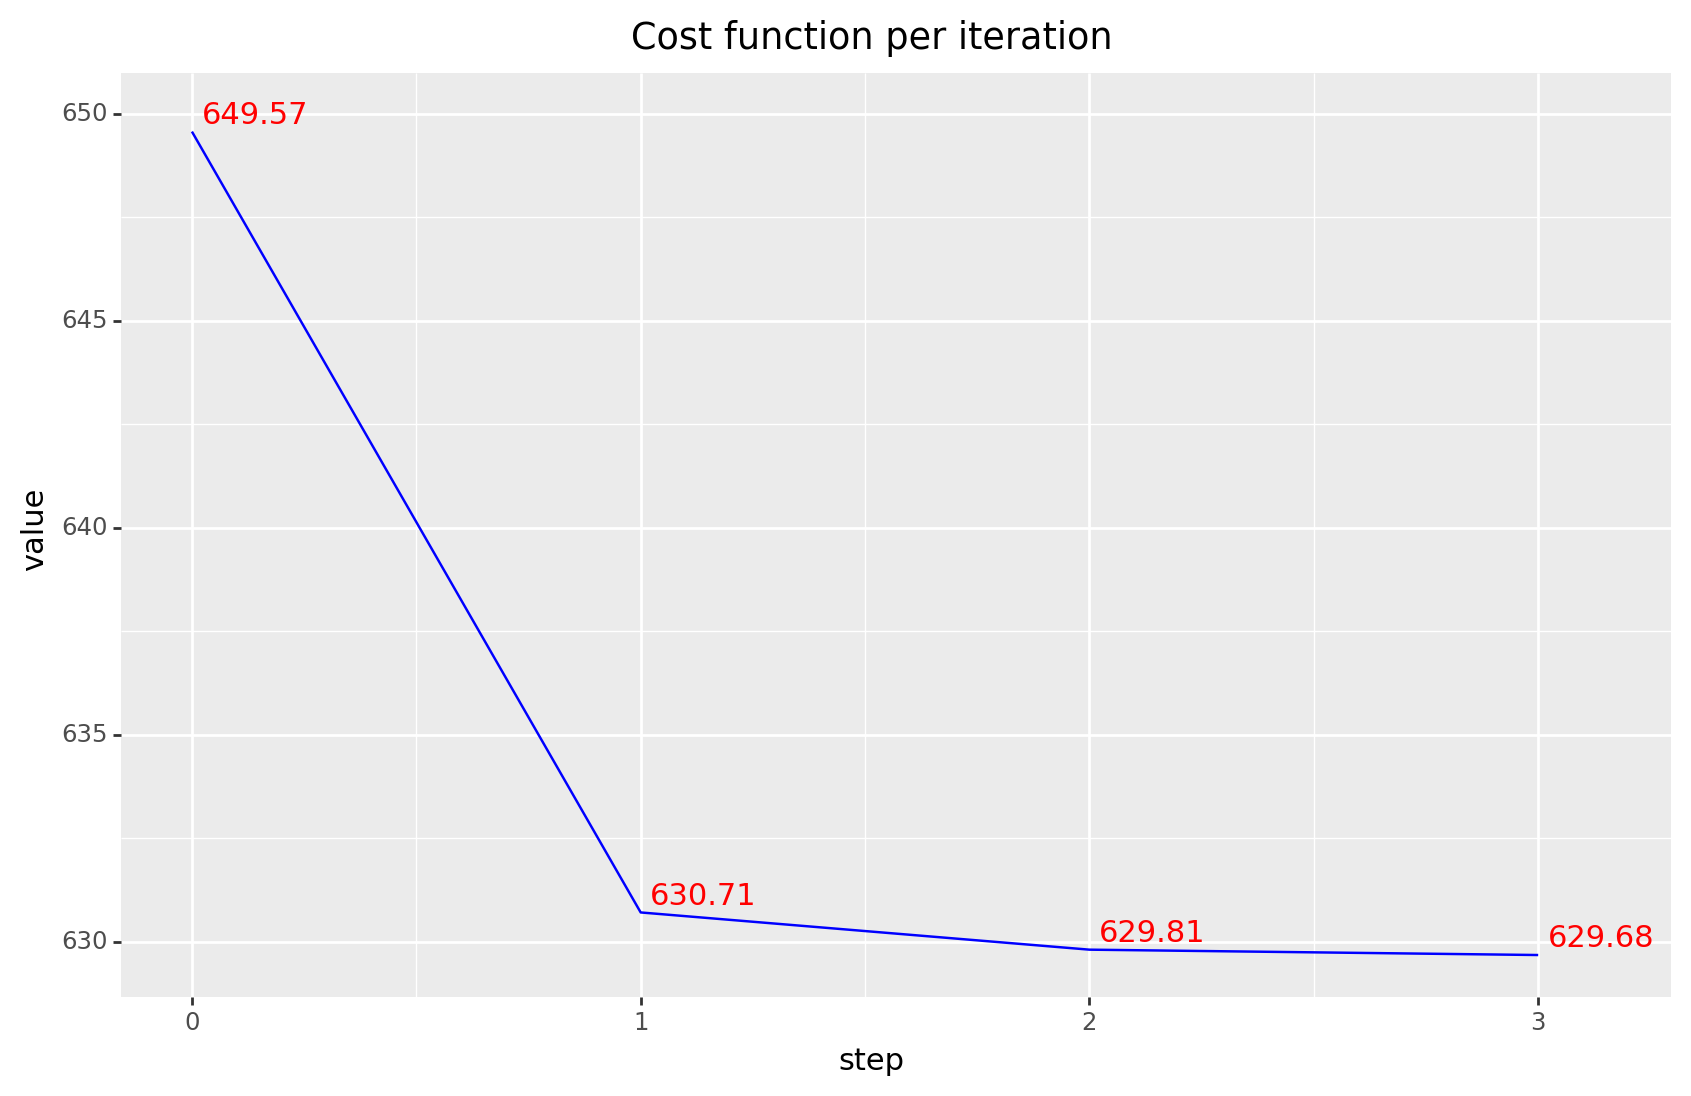

In [98]:
(ggplot(df_cost)
    + aes(
        x = 'step',
        y = 'value'
    )
    + geom_line(color = 'blue')
    + geom_text(
        aes(label = 'round(value,2)'),
        nudge_x=0.14,
        nudge_y=0.4,
        color = 'red'
    )
    + theme(
        figure_size=(10, 6)
    )
    + labs(title = 'Cost function per iteration')
).draw()
plt.show()